# Embeddings


Basically is how real world objects (data) are represented as real-valued vectors in a low-dimensional space.

The goal of embeddings is to capture the semantic relationships and similarities between data points or items. In other words, allows data points (e.g words) with similar meanings to have similar representation.

This concept is particularly prominent in the context of word embeddings in NLP, but it extends to various domains.




# Forms of Embeddings

- Image Embeddings (2D, 3D, Hyperspectral, Video)


- Text Embeddings (Single or Multi-lingual)
  - Word  
  - Sentence
  - Document

- Sound Embeddings (Single or Multi-lingual)

# Applications of Embeddings

- Natural Language Processing (NLP): sentiment analysis, machine translation, and named entity recognition.

- Recommendation Systems: collaborative filtering-based recommendation systems.

- Computer Vision: image retrieval, object recognition, and feature extraction.

- Graph Embeddings (represent nodes in a graph structure): social network analysis, fraud detection, anomaly detection, and recommendation systems.

# Basic Text Embedding

The very first set of techniques used for converting raw texts to numerical values is a class of handcrafted representation known as bag of words. It mainly represents texts with real-valued vectors based on the count of occurence of words in a supposed bag of words or vocabulary.

- One hot
- Bag of Words (BoW)
- TF-IDF (Term Frequency-Inverse Document Frequency)

## Bag of words

Corpus:

```
[
  The old players are being sold,
  The clubs are buying new players,
  Only the youth players are on loan
]
```

Making vocabulary of words List of unique words from the text corpus will be:

```
[
  "the", "old", "players", "are", "being", "sold", "clubs", "buying", "new", “only”, “youth”, “on”, "loan"
]
```

Create text vector

```
[
  "the": 1, "old": 1, "players": 1, "are": 1, "being": 1, "sold": 1, "clubs": 0, "buying": 0, "new": 0, "only": 0, "youth": 0, "on": 0, "loan": 0
]

The old players are being sold = [1,1,1,1,1,1,0,0,0,0,0,0,0]
The clubs are buying new players = [1,0,1,1,0,0,1,1,1,0,0,0,0]
Only the youth players are on loan = [1,0,1,1,0,0,0,0,0,1,1,1,1]

```

In [40]:
from collections import Counter

def preprocess(text):
    return text.lower().split()

def create_vocab(corpus):
    # Create a vocabulary from the corpus (list of unique words)
    all_words = [word for doc in corpus for word in preprocess(doc)]
    vocabulary = list(set(all_words))
    vocabulary.sort()
    return vocabulary

def create_text_vector(document, vocabulary):
    # Count the occurrences of each word in the document
    word_counts = Counter(preprocess(document))

    # Create a text vector based on the vocabulary
    text_vector = [word_counts[word] if word in word_counts else 0 for word in vocabulary]

    return text_vector

# Corpus
corpus = [
    "The old players are being sold",
    "The clubs are buying new players",
    "Only the youth players are on loan"
]

# Create vocabulary
vocabulary = create_vocab(corpus)

# Create text vectors
text_vectors = [create_text_vector(doc, vocabulary) for doc in corpus]

print("Vocabulary:", vocabulary)

# Display text vectors
for i, doc in enumerate(corpus):
    print(f"\nDocument {i + 1} Bag-of-Words:")
    print(text_vectors[i])


Vocabulary: ['are', 'being', 'buying', 'clubs', 'loan', 'new', 'old', 'on', 'only', 'players', 'sold', 'the', 'youth']

Document 1 Bag-of-Words:
[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]

Document 2 Bag-of-Words:
[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]

Document 3 Bag-of-Words:
[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]


# Advanced Text Embeddings

Basic embeddings are typically handcrafted and can't capture the contextual relationship among text. More advanced methods have been introduced, as a form of learned representations for the texts, which form contextual real-valued codebook of raw texts.

Nowadays, most embeddings are usually learned using (Deep) Neural Network, and the so called embeddings are derived from a hidden layer called the embedding layer, which is mostly the layer after the input layer.

```

  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Embedding

  model = Sequential()
  model.add(Input())
  model.add(Embedding())
  
```

- Word2Vec (Google in 2013) ---> Major Advancement
- GloVe (Stanford in 2014)
- Fasttext (Facebook in 2016)

- ELMo (Allen Institute for AI in 2018) ---> Major Advancement

- Transformers ---> Major Advancement
  - BERT (Google in 2018)
  - XLNET (Google in 2019)
  - GPT (OpenAI in 2018)
  - GPT-2 (OpenAI in 2019)
  - GPT-3 (OpenAI in 2020)
  - GPT 3.5 & 4 (OpenAI in 2022 & 2023 respectively) ****> RLHF

## Word2Vec


---


Word2Vec's objective is to learn vector representations that capture semantic relationships between words based on their context in a given corpus. Word2Vec itself is a single layer neural network, trained in an unsupervised way to learn continuous representation of words.

**Skip-Gram:**

Objective function: maximize the probability of predicting context words given a target word.

Formula: $$ \mathrm{P} (w_{context} | w_{target} ) $$

**CBOW:**

Objective function: maximize the probability of predicting the target word given its context.

Formula: $$ \mathrm{P} (w_{target} | w_{context} ) $$

---





## Skip-Gram


#### Target Vectors:

The word for which we want to predict its context vectors

##### During Training:

- Initialization: Initially, each word in the vocabulary is assigned a random vector (word vector).
- Prediction: During training, the model predicts the context words given a target word.
- Update: The model adjusts the target vector to minimize the difference between the predicted and actual context words.


#### Context Vectors:

The words surrounding the target word, forming the context in which the target word appears.

##### During Training:

- Initialization: Like target vectors, context vectors are initialized with random values.
- Prediction: The model predicts the target word given the context words.
- Update: The model adjusts the context vectors to minimize the difference between the predicted target word and the actual target word.

#### Learning Process:

- Objective: the primary objective is to learn meaningful representations in the vectors, capturing semantic relationships between words based on their co-occurrence in the training corpus.

- Update Rule (Simplified): the vectors are updated using a gradient descent-like approach. The model aims to reduce the difference (error) between the predicted probability of context words given the target word (or vice versa) and the actual occurrences in the training data.

- Mathematical Formulation: the specific update rule involves calculating gradients and adjusting vector values based on the derivative of the error with respect to the vectors.


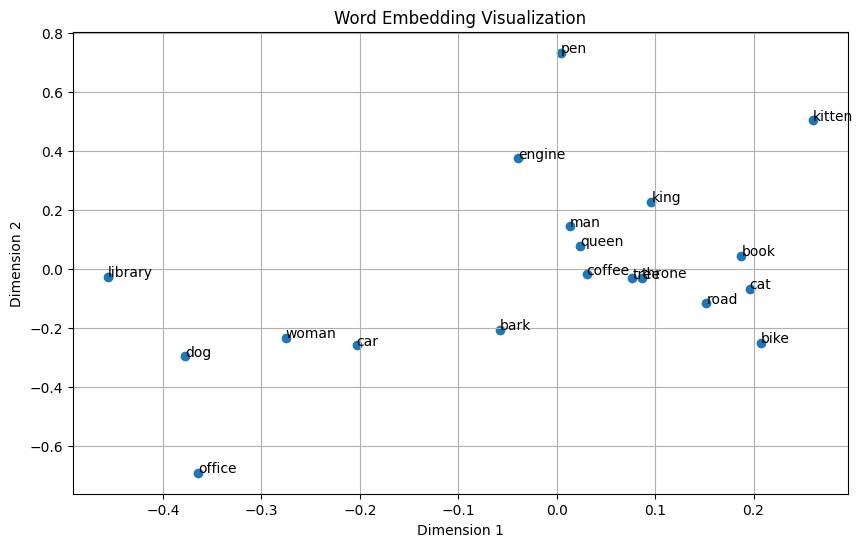

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from collections import defaultdict


class SkipGramWord2Vec:

    __slot__ =  'embedding_dim', 'learning_rate', 'word_vectors', 'context_vectors'

    def __init__(self, embedding_dim, learning_rate=0.001):
        self.embedding_dim = embedding_dim
        self.learning_rate = learning_rate
        self.word_vectors = defaultdict(lambda: np.random.uniform(-0.5, 0.5, embedding_dim))
        self.context_vectors = defaultdict(lambda: np.random.uniform(-0.5, 0.5, embedding_dim))

    def train(self, corpus, window_size=2, epochs=5):
        for epoch in range(epochs):
            for sentence in corpus:
                for i, target_word in enumerate(sentence):
                    context_words = sentence[max(0, i - window_size): i] + sentence[i + 1: min(i + window_size + 1, len(sentence))]

                    for context_word in context_words:
                        self.update_weights(target_word, context_word)

    def update_weights(self, target_word, context_word):
        target_vector = self.word_vectors[target_word]
        context_vector = self.context_vectors[context_word]

        dot_product = np.dot(target_vector, context_vector)
        sigmoid_dot = expit(dot_product)

        # Update word vectors
        error = sigmoid_dot - 1
        self.word_vectors[target_word] -= self.learning_rate * error * context_vector

        # Update context vectors
        error = sigmoid_dot - 0
        self.context_vectors[context_word] -= self.learning_rate * error * target_vector

# Data
corpus = [
    ['king', 'man', 'car'],
    ['cat', 'king', 'man'],
    ['queen', 'woman', 'bike'],
    ['king', 'kitten', 'man'],
    ['queen', 'pen', 'woman'],
    ['car', 'road', 'engine'],
    ['dog', 'bark', 'tree'],
    ['man', 'coffee', 'office'],
    ['woman', 'book', 'library'],
    ['king', 'queen', 'throne']
]

word2vec = SkipGramWord2Vec(embedding_dim=100, learning_rate=0.01)
word2vec.train(corpus, epochs=100)

# Extract word vectors and labels
word_labels = list(word2vec.word_vectors.keys())
word_embeddings = np.array([word2vec.word_vectors[word] for word in word_labels])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(word_embeddings[:, 0], word_embeddings[:, 1])

# Annotate each point with its word label
for i, word in enumerate(word_labels):
    plt.annotate(word, (word_embeddings[i, 0], word_embeddings[i, 1]))

plt.title('Word Embedding Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()



## Embeddings from Learning Models (ELMo)

It improves a bit on Word2vec and also a type of contextual word embedding with the goal of learning more than one representation for each word based on the context in which it appears (words with similar spelling but different meaning would have different representations).

The type of network used is Bi-LSTM and also trained similarly to Word2Vec in an unsupervised manner. Specifically, we use this RNN is used to predict the next word in a sentence given a current word. We use these networks for their ability to capture and maintain long term dependencies in their hidden states.

Model: "elmo_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 5)]                  0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 5, 100)               1700      ['input_layer[0][0]']         
                                                                                                  
 bidirectional_5 (Bidirecti  (None, 5, 128)               84480     ['embedding_5[0][0]']         
 onal)                                                                                            
                                                                                                  
 concatenate_5 (Concatenate  (None, 5, 228)               0         ['embedding_5[0][0]',

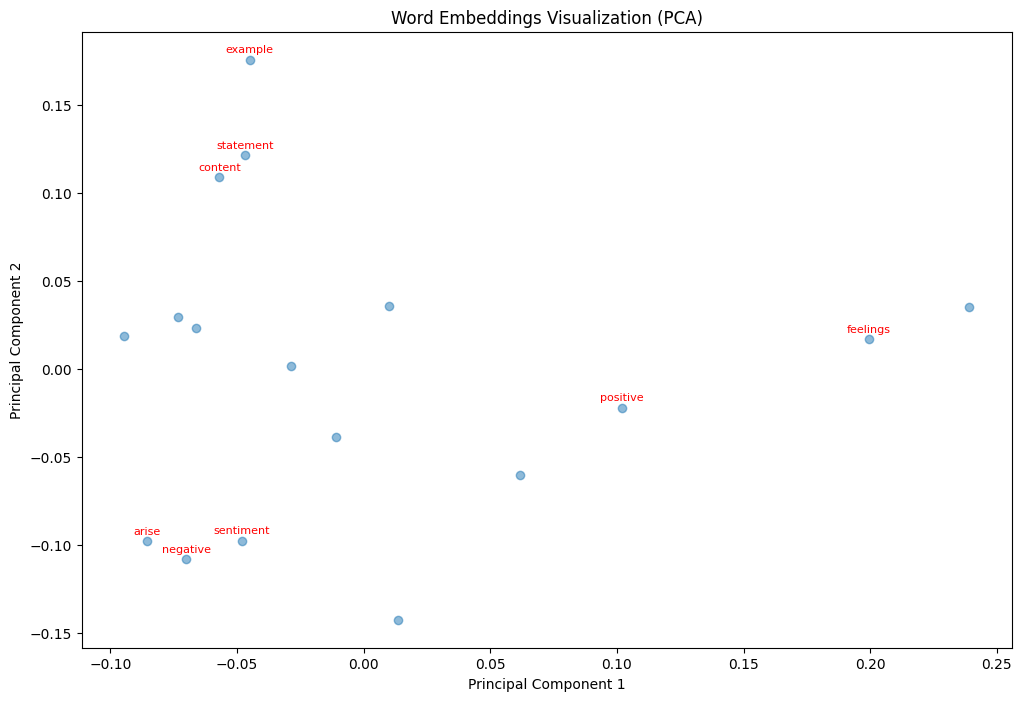

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    Input, Embedding, Bidirectional, LSTM, Concatenate
)


def build_elmo_model(vocab_size, embedding_dim, lstm_units, max_length):
    # Input layer for word indices
    input_layer = Input(shape=(max_length,), dtype=tf.int32, name='input_layer')

    # embedding layer
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)

    # Bi-LSTM layer
    lstm_layer = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(embedding_layer)

    # Concatenate input embedding and LSTM output
    output_layer = Concatenate(axis=-1)([embedding_layer, lstm_layer])

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='elmo_model')

    return model


# data
sentences = [
    "This is a positive sentence.",
    "Negative sentiment detected here.",
    "Positive statement.",
    "Another positive example.",
    "Negative feelings arise.",
    "More Negative content."
]

labels = [1, 0, 1, 1, 0, 0]

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to a fixed length
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the ELMo model
embedding_dim = 100
lstm_units = 64

elmo_model = build_elmo_model(vocab_size, embedding_dim, lstm_units, max_length)

elmo_model.summary()


# Compile the model
elmo_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

print(y_train)
# Train the model
history = elmo_model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=5,
    batch_size=1
)


## Extract the Embeddings

# from elmo_model
embedding_layer = None
for layer in elmo_model.layers:
    if isinstance(layer, tf.keras.layers.Embedding):
        embedding_layer = layer
        break

# Get the weights of the embedding layer
embedding_weights = np.array(embedding_layer.get_weights()[0])
print(embedding_weights)

# PCA on embedding weights
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embedding_weights)

# Plot the word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], alpha=0.5)
plt.title('Word Embeddings Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# annotation for some words
words_to_annotate = ['positive', 'negative', 'sentiment', 'statement', "example", "feelings", "arise", "content"]  # Replace with actual words
vocabulary = ["this", "positive", "sentence", "negative", "sentiment", "detected",
              "statement", "example", "feelings", "arise", "content"]

for word, (x, y) in zip(vocabulary, embeddings_pca):
    if word in words_to_annotate:
        plt.annotate(word, (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='red')

plt.show()

## Transformers

We have generally attained very successful performance training separate language models to produce word representation with better contextual affinity.

However, due to the nature of RNN-based models, it is difficult to scale their performance to very large corpus. One approach would be to train the embeddings for the words in parallel, but this is extremely difficult with RNNs because they are sequential and their hidden states are progressively dependent.

Transformers advances this method by:
- training the word embedding in parallel
- using bidirectional approach
- using attention mechanism
- pre-training with shared params


### BERT Model

One of earliest transformer models introduced by Google. It has the following layers:

- embedding: each word (tokens indices) is passed to the embedding layer to learn a contextual real-valued vector.
- transformer: a set of blocks in the architecture that applies attention mechanism to make the model focus on the most important words in a sentence.
- masked language model (MLM): a pre-training strategy used to predict masked words in a given sequence of text. During pre-training, a certain percentage of tokens in the input sequence are randomly selected and replaced with a special [MASK] token, and the model is then trained to predict the identity of the masked tokens based on the context provided by the surrounding tokens. This implicitly enforces bidirectional learning.


In [1]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


class BERT(nn.Module):
    
    def __init__(self, vocab_size, hidden_size, num_layers, num_heads):
        super(BERT, self).__init__()
        self.embedding = BERTEmbedding(vocab_size, hidden_size)
        self.transformer = BERTTransformer(hidden_size, num_layers, num_heads)
        self.mlm_head = nn.Linear(hidden_size, vocab_size)

    def forward(self, input_ids, attention_mask):
        embeddings = self.embedding(input_ids)
        transformer_output = self.transformer(embeddings, attention_mask)
        mlm_logits = self.mlm_head(transformer_output)
        return mlm_logits

class BERTEmbedding(nn.Module):

    def __init__(self, vocab_size, hidden_size):
        super(BERTEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_size)
        self.positional_encoding = PositionalEncoding(hidden_size)

    def forward(self, input_ids):
        embedded = self.embedding(input_ids)
        return self.positional_encoding(embedded)

class BERTTransformer(nn.Module):

    def __init__(self, hidden_size, num_layers, num_heads):
        super(BERTTransformer, self).__init__()
        self.layers = nn.ModuleList([
            TransformerLayer(hidden_size, num_heads) for _ in range(num_layers)
        ])

    def forward(self, embeddings, attention_mask):
        output = embeddings
        for layer in self.layers:
            output = layer(output, attention_mask)
        return output

class TransformerLayer(nn.Module):

    def __init__(self, hidden_size, num_heads):
        super(TransformerLayer, self).__init__()
        self.self_attention = MultiHeadAttention(hidden_size, num_heads)
        self.feedforward = nn.Sequential(
            nn.Linear(hidden_size, hidden_size * 4),
            nn.ReLU(),
            nn.Linear(hidden_size * 4, hidden_size)
        )
        self.layer_norm1 = nn.LayerNorm(hidden_size)
        self.layer_norm2 = nn.LayerNorm(hidden_size)

    def forward(self, x, attention_mask):
        attention_output = self.self_attention(x, x, x, attention_mask)
        x = x + attention_output
        x = self.layer_norm1(x)

        feedforward_output = self.feedforward(x)
        x = x + feedforward_output
        x = self.layer_norm2(x)

        return x


class MultiHeadAttention(nn.Module):

    def __init__(self, hidden_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.hidden_size = hidden_size
        self.num_heads = num_heads

        self.head_dim = hidden_size // num_heads

        assert (
            self.head_dim * num_heads == hidden_size
        ), "Hidden size must be divisible by the num of heads"

        self.full_linear = nn.Linear(hidden_size, hidden_size)
        self.split_heads = nn.Linear(hidden_size, num_heads * self.head_dim)
        device = 'cpu'
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)

    def forward(self, query, key, value, mask):
        batch_size = query.shape[0]

        # Linear transformation for the full attention
        Q = self.full_linear(query)
        K = self.full_linear(key)
        V = self.full_linear(value)

        # Split the hidden_size into num_heads and head_dim
        Q = self.split_heads(Q).view(batch_size, -1, self.num_heads, self.head_dim)
        K = self.split_heads(K).view(batch_size, -1, self.num_heads, self.head_dim)
        V = self.split_heads(V).view(batch_size, -1, self.num_heads, self.head_dim)

        # Transpose to get dimensions batch_size, num_heads, seq_len, head_dim
        Q = Q.transpose(1, 2)
        K = K.transpose(1, 2)
        V = V.transpose(1, 2)

        # Attention scores
        energy = torch.matmul(Q, K.transpose(-2, -1)) / self.scale

        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.softmax(energy, dim=-1)

        # Get the weighted sum
        x = torch.matmul(attention, V)

        # Reshape to batch_size, seq_len, hidden_size
        x = x.transpose(1, 2).contiguous().view(batch_size, -1, self.hidden_size)

        return x

class PositionalEncoding(nn.Module):
    
    def __init__(self, hidden_size, max_len=512):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, hidden_size)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, hidden_size, 2).float() * -(math.log(10000.0) / hidden_size))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        return x + self.encoding[:, : x.size(1)].detach()


ModuleNotFoundError: No module named 'torch'

In [111]:
larger_corpus = [
    ['king', 'man', 'queen', 'woman', 'prince', 'princess'],
    ['cat', 'kitten', 'dog', 'puppy', 'bird', 'penguin'],
    ['apple', 'orange', 'banana', 'grape', 'kiwi', 'pear'],
    ['car', 'bicycle', 'bus', 'train', 'plane', 'ship'],
    ['computer', 'phone', 'tablet', 'keyboard', 'mouse', 'monitor'],
    ['happy', 'sad', 'angry', 'excited', 'calm', 'surprised'],
]


# Data preprocessing
word_to_index = {word: idx for idx, word in enumerate(set(word for category in larger_corpus for word in category))}
index_to_word = {idx: word for word, idx in word_to_index.items()}

# Convert words to numerical indices
indexed_corpus = [[word_to_index[word] for word in category] for category in larger_corpus]

# Example training loop
vocab_size = len(word_to_index)
hidden_size = 256
num_layers = 10
num_heads = 8

model = BERT(vocab_size, hidden_size, num_layers, num_heads)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert indexed_corpus to PyTorch tensor
text_corpus = torch.tensor(indexed_corpus)
attention_mask = torch.ones_like(text_corpus)


# Training loop
epochs = 30
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    mlm_logits = model(text_corpus, attention_mask)

    # Ensure mlm_logits and text_corpus have the same sequence length
    target = text_corpus[:, :mlm_logits.size(1)]
    loss = criterion(mlm_logits.view(-1, vocab_size), target.view(-1))

    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


# Plot the loss
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

Epoch 1/30, Loss: 3.6960089206695557
Epoch 2/30, Loss: 2.7280797958374023
Epoch 3/30, Loss: 1.4630250930786133
Epoch 4/30, Loss: 1.2427527904510498
Epoch 5/30, Loss: 0.7522068619728088
Epoch 6/30, Loss: 0.5080654621124268
Epoch 7/30, Loss: 0.15659965574741364
Epoch 8/30, Loss: 0.07559062540531158
Epoch 9/30, Loss: 0.07747604697942734
Epoch 10/30, Loss: 0.051445312798023224
Epoch 11/30, Loss: 0.038555487990379333
Epoch 12/30, Loss: 0.035447463393211365
Epoch 13/30, Loss: 0.032628223299980164
Epoch 14/30, Loss: 0.028816260397434235
Epoch 15/30, Loss: 0.025315476581454277
Epoch 16/30, Loss: 0.022351853549480438
Epoch 17/30, Loss: 0.01969437301158905
Epoch 18/30, Loss: 0.01726829633116722
Epoch 19/30, Loss: 0.015101964585483074
Epoch 20/30, Loss: 0.01323991920799017
Epoch 21/30, Loss: 0.011670542880892754
Epoch 22/30, Loss: 0.010375947691500187
Epoch 23/30, Loss: 0.00931251235306263
Epoch 24/30, Loss: 0.008440503850579262
Epoch 25/30, Loss: 0.007720526773482561
Epoch 26/30, Loss: 0.0071168

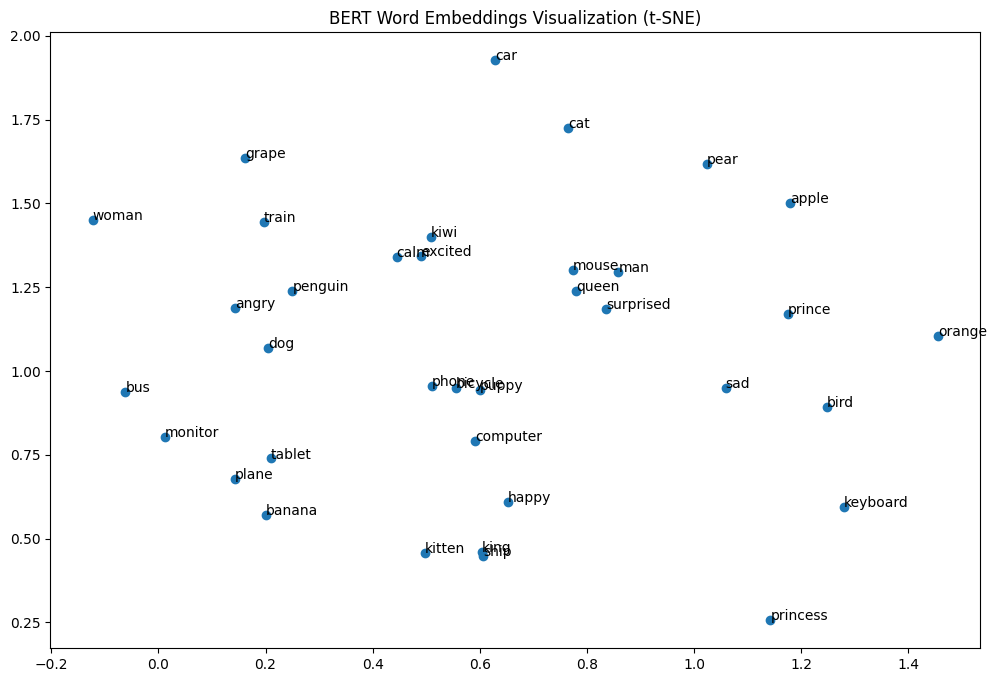

In [112]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# The BERTEmbedding is the first layer
embedding_layer = model.embedding.embedding.weight.detach().numpy()

# Extract the embeddings for each word
word_embeddings = [embedding_layer[word_to_index[word]] for word in word_to_index]

word_embeddings = np.array(word_embeddings)

# t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(word_embeddings)

plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# plot each point with its word label
for i, word in enumerate(word_to_index.keys()):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title('BERT Word Embeddings')
plt.show()
